# HW 2 : Putting Twitter Data into the Cloud

**Don't forget!**
* You will need to install the pymongo library to access MongoDB
 * pip install pymongo
* You will also need to install dnspython to access the cloud version of MongoDB
 * pip install dnspython

** NOTE **
* **Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost**.

# Problem 1 (25 points):  Get a cloud database account using MongoDB Atlas and connect to the MongoDB

Get a free cloud hosted MongoDB database account at https://www.mongodb.com/cloud/atlas.  You will need to: 

* Create a database cluster using the MongoDB web interface
* Get your MongoDB credentials using the MongoDB web interface
* Connect to the MongoDB, and create a database and a document collection in MongoDB (Do this in the below cell) 

In [49]:


#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pymongo
from pymongo import MongoClient

client = pymongo.MongoClient("mongodb+srv://@twitter.vntizxz.mongodb.net/?retryWrites=true&w=majority")
db = client.test

db = client['Twitter']

q = '#Biden'
coll = db['statuses_'+q]



# Problem 2 (25 points):  Read Twitter data into your cloud MongoDB database

Gather Twitter data and upload it to your cloud database.  You will need to:
* Gather Twitter data by using Twitter search API as in HW1
* Upload your Twitter data to the MongoDB document collection

In [50]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import twitter

# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = ''
CONSUMER_SECRET =''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

#------------------------------------ Connecting above, adding to mongodb below

import json

q = '#Biden'
count = 100

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError:
        break
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
print(json.dumps(statuses, indent=4))

_ = coll.insert_many(statuses)
    

coll = db['statuses_'+q]


Length of statuses 100
Length of statuses 200
Length of statuses 200
[
    {
        "created_at": "Wed Feb 08 20:29:06 +0000 2023",
        "id": 1623418668213231616,
        "id_str": "1623418668213231616",
        "text": "De Verenigde Staten zijn dus verantwoordelijk voor de energiecrisis in Nederland en de rest van Europa.\nAl die onde\u2026 https://t.co/dRy4c4Ldmo",
        "truncated": true,
        "entities": {
            "hashtags": [],
            "symbols": [],
            "user_mentions": [],
            "urls": [
                {
                    "url": "https://t.co/dRy4c4Ldmo",
                    "expanded_url": "https://twitter.com/i/web/status/1623418668213231616",
                    "display_url": "twitter.com/i/web/status/1\u2026",
                    "indices": [
                        117,
                        140
                    ]
                }
            ]
        },
        "metadata": {
            "iso_language_code": "nl",
            "re

# Problem 3 (25 points):  Use a regular expression to read a subset of your Tweets out of MongoDB

Use regular expressions to analyze properties of your data.  For example, you can 
* search for tweets with geotags, 
* search for tweets that can contain a certain string,

In [53]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


#--------------- GeoTag --------------- #
cnt = coll.count_documents({'geo': {'$ne': None}})
print(cnt)

cursor = coll.find({'geo': {'$ne': None}})

for tweet in cursor:
    print(tweet['Biden'])

    
#-------------------Certain String ---------------#
cnt = coll.count_documents({'$or': [ {'retweeted': 'true'} ,
                            {'text':  {'$regex': '.*trump.*', '$options': 'i' }} ] })
print(cnt)
cursor = coll.find({'$or': [ {'retweeted': 'true'} ,
                            {'text':  {'$regex': '.*trump.*', '$options': 'i' }} ] })

for tweet in cursor:
    print(tweet['text'])
    
    

0
26
@Jim_Jordan This #SOTU showed how quickly the policy damage from Trump is being undone and how fast The Donald is b… https://t.co/d6DU0tkqlQ
Many people don't know this, but  the House GOP was planning on ditching Trump's trade policies in favour of Neo-Li… https://t.co/aJoIwY2JWB
RT @LawrenceSellin: This is a parcel of land in central Florida bought by the Chinese to build a biolab.

#USA #China #Biden #Trump #Covid…
RT @BradandBritt: NEW EPISODE #Biden #SOTU #Republicans #Trump #MAGA #MTG @myndkrime @MrPusswack @sidlone @brysports @ekasnia @mmoorewriter…
RT @PeterSchiff: #Biden's claim to have cut the deficit by $1.7 trillion is a lie. @POTUS 's post-Covid deficits are much larger than Trump…
RT @PeterSchiff: #Biden's claim to have cut the deficit by $1.7 trillion is a lie. @POTUS 's post-Covid deficits are much larger than Trump…
RT @LawrenceSellin: This is a parcel of land in central Florida bought by the Chinese to build a biolab.

#USA #China #Biden #Trump #Covid…
RT @PeterS

# Problem 4 (25 points): Analyze and/or Visualize the subset
Anayze the subset or visualize it based on an interesting question. 
* Define what question you would like to answer?
* Answer the question via the analysis and/or visualization


In [ ]:
#What question would you like to answer? < The amount of retweets the tweets got >

Text(0, 0.5, 'Number of tweets in bin')

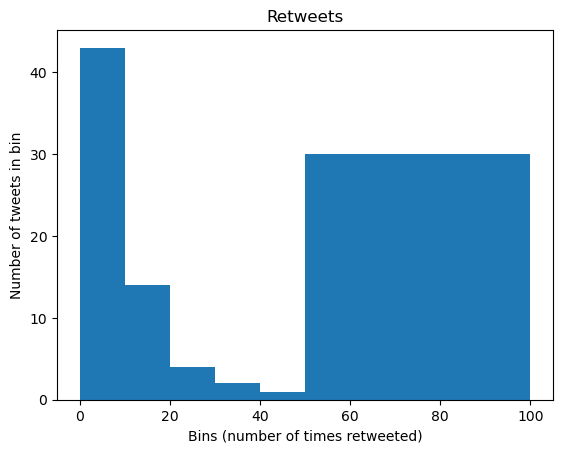

In [56]:
#Answer the question via the analysis and/or visualization

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt
%matplotlib inline

bins=[0, 10, 20, 30, 40, 50, 100]
retweets = [
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            for status in statuses 
            
                if 'retweeted_status' in status.keys()
           ]
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]


counts = [count for count, _, _, _ in retweets]


plt.hist(counts, bins)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')






In [ ]:
#How did you answer the question and what did you find/learn?
#  I would say there's a strong skew towards the upper end 

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook with all output, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 

** How to submit: **
        Please submit through canvas.wpi.edu
